# Logistic Regression

The logistic regression is implemented in LogisticRegression. Despite its name, it is implemented as a linear model for classification rather than regression in terms of the scikit-learn/ML nomenclature. The logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a [logistic function](https://en.wikipedia.org/wiki/Logistic_function).

$ y_{pred} = (\frac{L}{1 + e^{-w(X-X_{0})}}) $

## [Decision Boundaries of Multinomial and One-vs-Rest Logistic Regression](https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html#sphx-glr-auto-examples-linear-model-plot-logistic-multinomial-py)

### Dataset Generation

We generate a synthetic dataset using make_blobs function. The dataset consists of 1,000 samples from three different classes, centered around [-5, 0], [0, 1.5], and [5, -1]. 

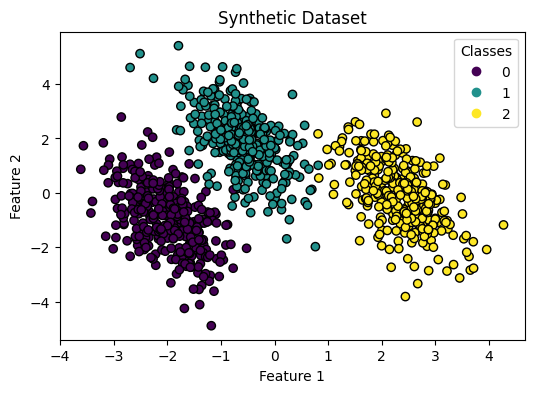

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs

centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1_000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

fig, ax = plt.subplots(figsize=(6, 4))

scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="black")
ax.set(title="Synthetic Dataset", xlabel="Feature 1", ylabel="Feature 2")
_ = ax.legend(*scatter.legend_elements(), title="Classes")

### Classifier Training

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

logistic_regression_multinomial = LogisticRegression().fit(X, y)
logistic_regression_ovr = OneVsRestClassifier(LogisticRegression()).fit(X, y)

accuracy_multinomial = logistic_regression_multinomial.score(X, y)
accuracy_ovr = logistic_regression_ovr.score(X, y)

### Decision Boundaries Visualization

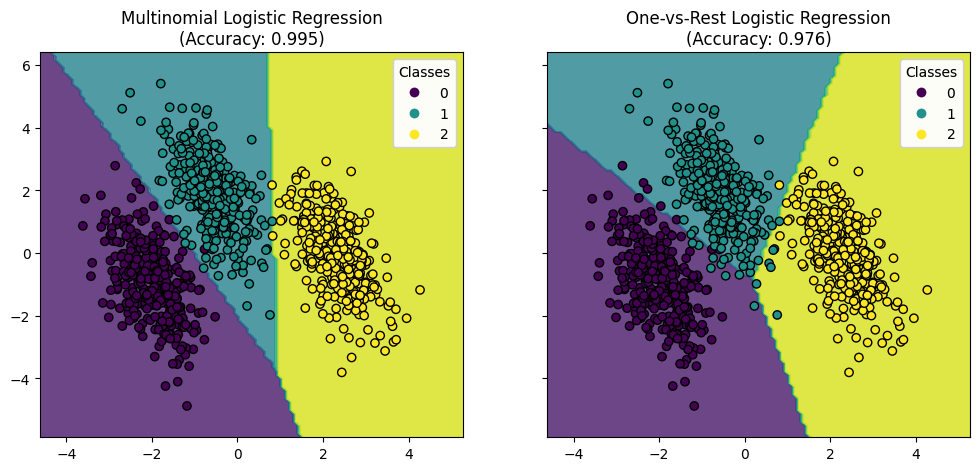

In [3]:
from sklearn.inspection import DecisionBoundaryDisplay

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

for model, title, ax in [
    (
        logistic_regression_multinomial,
        f"Multinomial Logistic Regression\n(Accuracy: {accuracy_multinomial:.3f})",
        ax1,
    ),
    (
        logistic_regression_ovr,
        f"One-vs-Rest Logistic Regression\n(Accuracy: {accuracy_ovr:.3f})",
        ax2,
    ),
]:
    DecisionBoundaryDisplay.from_estimator(
        model,
        X,
        ax=ax,
        response_method="predict",
        alpha=0.8,
    )
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    legend = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend)
    ax.set_title(title)